In [1]:
import pandas as pd
import numpy as np
import datetime 
from IPython.display import display
#import plotly.express as px
#import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [2]:
#set file paths 

file_red_light ="red light.csv" 
file_traffic = "KSI_Incidents.csv"

In [3]:
#latitude and longitude of Toronto
lat = 43.651070       
lng = -79.347015

In [4]:
#read redlight camera file

redlight=pd.read_csv(file_red_light,index_col='ID')
redlight

,CAMERA_ID,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,LONGITUDE,LATITUDE,ACTIVATION_TIME
ID,,,,,,,
1,20770,13465959.0,Richmond St E,Parliament St,-79.364023,43.654559,2007-11-09 05:00:00
2,20771,13467993.0,Lake Shore Blvd W,York St,-79.380868,43.641460,2007-11-09 05:00:00
3,20772,13444656.0,Steeles Ave W,Carpenter Rd,-79.447589,43.792013,2007-11-09 05:00:00
4,20773,13444138.0,Steeles Ave W,Hilda Ave,-79.429267,43.796007,2007-11-09 05:00:00
5,20774,13451893.0,Albion Rd,Silverstone Dr,-79.600094,43.742952,2007-11-09 05:00:00
...,...,...,...,...,...,...,...
190,20959,13445620.0,Steeles Ave W,Alness St,-79.481057,43.784700,2021-07-29 04:00:00
191,20960,13467918.0,Burnhamthorpe Rd,The West Mall,-79.567250,43.644552,2021-08-27 04:00:00
192,20961,13464218.0,Jane St,St Clair Ave W,-79.491767,43.667184,2021-08-16 04:00:00


In [5]:
redlight.sort_values("ACTIVATION_TIME", inplace=True)
redlight.drop_duplicates(subset ="LONGITUDE",keep = 'first', inplace = True)
redlight.info()
#check if the camera activated later at the same intersection was dropped 
redlight[redlight['INTERSECTION_ID']==13456952.0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CAMERA_ID           189 non-null    int64  
 1   INTERSECTION_ID     184 non-null    float64
 2   LINEAR_NAME_FULL_1  184 non-null    object 
 3   LINEAR_NAME_FULL_2  184 non-null    object 
 4   LONGITUDE           189 non-null    float64
 5   LATITUDE            189 non-null    float64
 6   ACTIVATION_TIME     189 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.8+ KB


,CAMERA_ID,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,LONGITUDE,LATITUDE,ACTIVATION_TIME
ID,,,,,,,
54,20823,13456952.0,Keele St,Lawrence Ave W,-79.478062,43.708659,2009-03-19 04:00:00


In [6]:
redlight.to_csv('rl camera.csv')

In [7]:
#define a function to extract year and month from timeseries
def time_to_date(x):
  return pd.to_datetime(x['DATE_TIME']).strftime('%Y-%m')

In [8]:
#chamge the column of ACTIVATION_TIME to DATE_TIME
#add another column to indicate the data type is camera
redlight.rename(columns={'ACTIVATION_TIME': 'DATE_TIME'}, inplace=True)
redlight['DATA_TYPE']='Camera'

In [9]:
#add another column to indicate the year and month when the camera is activated
redlight['DATE']=redlight.apply(time_to_date,axis=1)
redlight

,CAMERA_ID,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,LONGITUDE,LATITUDE,DATE_TIME,DATA_TYPE,DATE
ID,,,,,,,,,
1,20770,13465959.0,Richmond St E,Parliament St,-79.364023,43.654559,2007-11-09 05:00:00,Camera,2007-11
5,20774,13451893.0,Albion Rd,Silverstone Dr,-79.600094,43.742952,2007-11-09 05:00:00,Camera,2007-11
4,20773,13444138.0,Steeles Ave W,Hilda Ave,-79.429267,43.796007,2007-11-09 05:00:00,Camera,2007-11
9,20778,13449607.0,Bathurst St,Sheppard Ave W,-79.438481,43.755458,2007-11-09 05:00:00,Camera,2007-11
2,20771,13467993.0,Lake Shore Blvd W,York St,-79.380868,43.641460,2007-11-09 05:00:00,Camera,2007-11
...,...,...,...,...,...,...,...,...,...
186,20955,13449501.0,Lawrence Ave E,Brimley Rd,-79.255367,43.753526,2021-08-27 04:00:00,Camera,2021-08
193,20962,13448022.0,Willowdale Ave,Spring Garden Ave,-79.400906,43.766343,2021-08-27 04:00:00,Camera,2021-08
194,20963,13448822.0,Markham Rd,Greencedar Crct,-79.224709,43.757840,2021-08-27 04:00:00,Camera,2021-08


In [10]:
#redefine camera id from 1 to 189
redlight.drop('CAMERA_ID',axis=1)

,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,LONGITUDE,LATITUDE,DATE_TIME,DATA_TYPE,DATE
ID,,,,,,,,
1,13465959.0,Richmond St E,Parliament St,-79.364023,43.654559,2007-11-09 05:00:00,Camera,2007-11
5,13451893.0,Albion Rd,Silverstone Dr,-79.600094,43.742952,2007-11-09 05:00:00,Camera,2007-11
4,13444138.0,Steeles Ave W,Hilda Ave,-79.429267,43.796007,2007-11-09 05:00:00,Camera,2007-11
9,13449607.0,Bathurst St,Sheppard Ave W,-79.438481,43.755458,2007-11-09 05:00:00,Camera,2007-11
2,13467993.0,Lake Shore Blvd W,York St,-79.380868,43.641460,2007-11-09 05:00:00,Camera,2007-11
...,...,...,...,...,...,...,...,...
186,13449501.0,Lawrence Ave E,Brimley Rd,-79.255367,43.753526,2021-08-27 04:00:00,Camera,2021-08
193,13448022.0,Willowdale Ave,Spring Garden Ave,-79.400906,43.766343,2021-08-27 04:00:00,Camera,2021-08
194,13448822.0,Markham Rd,Greencedar Crct,-79.224709,43.757840,2021-08-27 04:00:00,Camera,2021-08


In [11]:
#create new camera ID
rlcameraid=list(range(189))
rlcameraid=[x+1 for x in rlcameraid]


In [12]:
redlight['CAMERA_ID']=rlcameraid

In [13]:
#open toronto accident file
trafficaccident=pd.read_csv(file_traffic)
trafficaccident.sort_values(by="DATE_TIME")

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,X,Y,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,...,NO_INJURY_COUNT,NULL_INJURY_COUNT,DRIVERS_COUNT,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT
140,893184,Non-Fatal Injury,Automobile,"Speeding Related Collision, Alcohol Related ...",-8.829728e+06,5.419071e+06,43.699595,-79.318797,2006-01-01 02:36:00,Major Arterial,...,1,1,2,0,5,0,0,2,0,6
247,909646,Non-Fatal Injury,Automobile,Not Recorded,-8.829438e+06,5.416805e+06,43.684874,-79.316188,2006-01-01 03:15:00,Major Arterial,...,1,1,1,0,3,0,0,1,0,4
89,884090,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.839464e+06,5.411883e+06,43.652892,-79.406253,2006-01-02 07:05:00,Major Arterial,...,1,0,1,1,0,0,0,1,0,1
97,885782,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.842507e+06,5.412229e+06,43.655145,-79.433590,2006-01-04 19:40:00,Major Arterial,...,1,0,1,1,0,0,0,1,0,1
84,882079,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.832963e+06,5.431006e+06,43.777056,-79.347858,2006-01-06 22:10:00,Major Arterial,...,1,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,2400863,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,-8.836329e+06,5.414383e+06,43.669143,-79.378094,2020-12-21 20:35:00,Collector,...,1,0,1,1,0,0,0,1,0,1
3676,2419967,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,-8.858780e+06,5.410190e+06,43.641887,-79.579777,2020-12-25 03:18:00,<Null>,...,0,0,1,0,1,0,0,1,0,1
3677,2431394,Non-Fatal Injury,Automobile,"Speeding Related Collision, Aggressive and Di...",-8.825109e+06,5.426686e+06,43.749034,-79.277302,2020-12-27 15:20:00,<Null>,...,1,0,2,0,2,0,0,2,0,2
3678,2449891,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.835470e+06,5.412738e+06,43.658450,-79.370373,2020-12-30 17:00:00,<Null>,...,1,0,1,1,0,0,0,1,0,1


In [14]:
#create another DF to only show accnum, latitude and longitude, which will be transformed to an array
tfa=trafficaccident[['ACCNUM','LATITUDE','LONGITUDE']]


In [15]:
#create a function to select accidents happened near redlight cameras and assign the camera_id to the accidents 
def selectclose(df):
  rl=redlight[['LATITUDE','LONGITUDE']].to_numpy()
  ta=df[['LATITUDE','LONGITUDE']].to_numpy()
  accnum=[]   #record accidents that happened near the redlight camera
  cameraid=[] #record camera id when the accidents happened near the redlight camera 

  for row in ta:
    accnumr=[] 
    
    i=1
    for x in rl:
      if np.allclose(x, row, rtol=0, atol=5e-04):
        accnumr.append('True')
        cameraid.append(i)
      else:
        accnumr.append('False')
      i=i+1 
    if accnumr.count('True')==0:
      accnum.append('False')
    else:
      accnum.append('True')
    

 
         

        
  return accnum, cameraid


In [16]:
[comparelist,cameralist]=selectclose(tfa)


In [17]:
comparelist.count('True')

536

In [18]:
print(len(cameralist))

536


In [19]:
print(len(comparelist))

5999


In [20]:
#denote the accidents if they happened in the areas with camera
tfa['REDLIGHT_CAMERA']=comparelist

<ipython-input-20-9a6422be2028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfa['REDLIGHT_CAMERA']=comparelist


In [22]:
tfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           5999 non-null   int64  
 1   LATITUDE         5999 non-null   float64
 2   LONGITUDE        5999 non-null   float64
 3   REDLIGHT_CAMERA  5999 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 187.6+ KB


In [23]:
#there are roughly 536 accidents in the area with cameras, but it needs to be confined with the consideration of ACCLOC
tfa.REDLIGHT_CAMERA.value_counts()

False    5463
True      536
Name: REDLIGHT_CAMERA, dtype: int64

In [24]:
tfa.head()

,ACCNUM,LATITUDE,LONGITUDE,REDLIGHT_CAMERA
0,25301,43.710967,-79.377116,False
1,26294,43.659568,-79.375560,False
2,37330,43.649699,-79.433650,False
3,45664,43.725577,-79.297481,False
4,56815,43.701876,-79.575588,True


In [25]:
# add three columns to the original trafficaccident file
trafficaccident['REDLIGHT_CAMERA']='False'
trafficaccident['DATE']=trafficaccident.apply(time_to_date,axis=1)
trafficaccident['DATA_TYPE']='Accident'

In [26]:
tfa['ACCLOC']=trafficaccident['ACCLOC']

<ipython-input-26-9ffc02693029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfa['ACCLOC']=trafficaccident['ACCLOC']


In [27]:
tfa.tail()

,ACCNUM,LATITUDE,LONGITUDE,REDLIGHT_CAMERA,ACCLOC
5994,9002496688,43.753241,-79.516650,False,Non Intersection
5995,9002500056,43.676577,-79.448985,False,Non Intersection
5996,9002500260,43.658438,-79.384853,False,At Intersection
5997,9002501134,43.691519,-79.570796,True,At Intersection
5998,9085345312,43.677485,-79.351924,False,Intersection Related


In [28]:
#create another simplified DF that only list accidents near the redlight cameras 
tfa1=tfa[tfa['REDLIGHT_CAMERA']=='True']

In [29]:
#assign the accidents that happened near cameras with camera ID
tfa1['CAMERA_ID']=cameralist

<ipython-input-29-a9c326731bd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfa1['CAMERA_ID']=cameralist


In [30]:
tfatest=tfa1[(tfa1['ACCLOC']=='Intersection Related') | (tfa1['ACCLOC']=='At Intersection')]
tfatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 4 to 5997
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           446 non-null    int64  
 1   LATITUDE         446 non-null    float64
 2   LONGITUDE        446 non-null    float64
 3   REDLIGHT_CAMERA  446 non-null    object 
 4   ACCLOC           446 non-null    object 
 5   CAMERA_ID        446 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 24.4+ KB


In [31]:
#confine the accidents that happened near camera to intersection 
tfa1=tfa1[(tfa1['ACCLOC']=='Intersection Related') | (tfa1['ACCLOC']=='At Intersection') | (tfa1['ACCLOC']=='<Null>')]
tfa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 4 to 5997
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           515 non-null    int64  
 1   LATITUDE         515 non-null    float64
 2   LONGITUDE        515 non-null    float64
 3   REDLIGHT_CAMERA  515 non-null    object 
 4   ACCLOC           515 non-null    object 
 5   CAMERA_ID        515 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 28.2+ KB


In [32]:
tfa1.REDLIGHT_CAMERA.value_counts()

True    515
Name: REDLIGHT_CAMERA, dtype: int64

In [33]:
tfa1.ACCLOC.value_counts()

At Intersection         414
<Null>                   69
Intersection Related     32
Name: ACCLOC, dtype: int64

In [34]:
tfa1.REDLIGHT_CAMERA.value_counts()

True    515
Name: REDLIGHT_CAMERA, dtype: int64

In [35]:
#replace the accidents of Null with intersection related 
tfa1.ACCLOC.replace({'<Null>':'Intersection Related'}, inplace=True)

In [36]:
tfa1.ACCLOC.value_counts()

At Intersection         414
Intersection Related    101
Name: ACCLOC, dtype: int64

In [37]:
tfa1.head()

,ACCNUM,LATITUDE,LONGITUDE,REDLIGHT_CAMERA,ACCLOC,CAMERA_ID
4,56815,43.701876,-79.575588,True,At Intersection,178
26,212688,43.750178,-79.463344,True,At Intersection,170
40,382209,43.737101,-79.343410,True,At Intersection,65
58,540779,43.718154,-79.240329,True,At Intersection,152
67,627897,43.708586,-79.478046,True,At Intersection,44


In [38]:
redlight.head()

,CAMERA_ID,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,LONGITUDE,LATITUDE,DATE_TIME,DATA_TYPE,DATE
ID,,,,,,,,,
1,1,13465959.0,Richmond St E,Parliament St,-79.364023,43.654559,2007-11-09 05:00:00,Camera,2007-11
5,2,13451893.0,Albion Rd,Silverstone Dr,-79.600094,43.742952,2007-11-09 05:00:00,Camera,2007-11
4,3,13444138.0,Steeles Ave W,Hilda Ave,-79.429267,43.796007,2007-11-09 05:00:00,Camera,2007-11
9,4,13449607.0,Bathurst St,Sheppard Ave W,-79.438481,43.755458,2007-11-09 05:00:00,Camera,2007-11
2,5,13467993.0,Lake Shore Blvd W,York St,-79.380868,43.641460,2007-11-09 05:00:00,Camera,2007-11


In [39]:
trafficaccident.head()

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,X,Y,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,...,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE
0,25301,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.836220e+06,5.420822e+06,43.710967,-79.377116,2020-01-04 18:50:00,Major Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
1,26294,Fatal,"Pedestrian, Automobile",Not Recorded,-8.836047e+06,5.412910e+06,43.659568,-79.375560,2020-01-04 22:14:00,Major Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
2,37330,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,-8.842513e+06,5.411391e+06,43.649699,-79.433650,2020-01-06 15:55:00,Minor Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
3,45664,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,-8.827355e+06,5.423072e+06,43.725577,-79.297481,2020-01-07 18:50:00,Major Arterial,...,0,1,0,0,2,0,1,False,2020-01,Accident
4,56815,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",-8.858314e+06,5.419422e+06,43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,...,0,0,0,0,3,0,1,False,2020-01,Accident


In [40]:
trafficaccident.ACCLOC.value_counts()

At Intersection          2826
<Null>                   1837
Non Intersection          805
Intersection Related      378
At/Near Private Drive     133
Overpass or Bridge          7
Private Driveway            5
Laneway                     4
Underpass or Tunnel         3
Trail                       1
Name: ACCLOC, dtype: int64

In [41]:
trafficaccident.REDLIGHT_CAMERA.value_counts()

False    5999
Name: REDLIGHT_CAMERA, dtype: int64

In [42]:
#update the ACCLOC of original incident DF
trafficaccident.update(tfa1)

In [43]:
trafficaccident.ACCLOC.value_counts()

At Intersection          2826
<Null>                   1768
Non Intersection          805
Intersection Related      447
At/Near Private Drive     133
Overpass or Bridge          7
Private Driveway            5
Laneway                     4
Underpass or Tunnel         3
Trail                       1
Name: ACCLOC, dtype: int64

In [44]:
trafficaccident.REDLIGHT_CAMERA.value_counts()

False    5484
True      515
Name: REDLIGHT_CAMERA, dtype: int64

In [45]:
trafficaccident.head()

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,X,Y,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,...,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE
0,25301.0,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.836220e+06,5.420822e+06,43.710967,-79.377116,2020-01-04 18:50:00,Major Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
1,26294.0,Fatal,"Pedestrian, Automobile",Not Recorded,-8.836047e+06,5.412910e+06,43.659568,-79.375560,2020-01-04 22:14:00,Major Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
2,37330.0,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,-8.842513e+06,5.411391e+06,43.649699,-79.433650,2020-01-06 15:55:00,Minor Arterial,...,1,0,0,0,1,0,1,False,2020-01,Accident
3,45664.0,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,-8.827355e+06,5.423072e+06,43.725577,-79.297481,2020-01-07 18:50:00,Major Arterial,...,0,1,0,0,2,0,1,False,2020-01,Accident
4,56815.0,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",-8.858314e+06,5.419422e+06,43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,...,0,0,0,0,3,0,1,True,2020-01,Accident


In [46]:
#add Camera ID to the orignial accident DF 
trafficaccident=trafficaccident.set_index('ACCNUM').join(tfa1[['ACCNUM','CAMERA_ID']].set_index('ACCNUM'))

In [47]:
trafficaccident.head()

,ACCLASS,INVOLVED,MOTIVE,X,Y,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,ACCLOC,...,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE,CAMERA_ID
ACCNUM,,,,,,,,,,,,,,,,,,,,,
25301.0,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.836220e+06,5.420822e+06,43.710967,-79.377116,2020-01-04 18:50:00,Major Arterial,Intersection Related,...,0,0,0,1,0,1,False,2020-01,Accident,NaN
26294.0,Fatal,"Pedestrian, Automobile",Not Recorded,-8.836047e+06,5.412910e+06,43.659568,-79.375560,2020-01-04 22:14:00,Major Arterial,Non Intersection,...,0,0,0,1,0,1,False,2020-01,Accident,NaN
37330.0,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,-8.842513e+06,5.411391e+06,43.649699,-79.433650,2020-01-06 15:55:00,Minor Arterial,At Intersection,...,0,0,0,1,0,1,False,2020-01,Accident,NaN
45664.0,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,-8.827355e+06,5.423072e+06,43.725577,-79.297481,2020-01-07 18:50:00,Major Arterial,At Intersection,...,1,0,0,2,0,1,False,2020-01,Accident,NaN
56815.0,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",-8.858314e+06,5.419422e+06,43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,At Intersection,...,0,0,0,3,0,1,True,2020-01,Accident,178.0


In [48]:
#change the column name of camera date time and camera date
redlight_mod=redlight.rename(columns={"DATE_TIME":"CAMERA_DATE_TIME","DATE":"CAMERA_DATE"})

In [49]:
#add camera date time and camera date to original accident DF and rename the new DF
accident_organized=trafficaccident.reset_index().merge(redlight_mod[['CAMERA_ID','CAMERA_DATE_TIME','CAMERA_DATE']],how='left',on='CAMERA_ID')

In [50]:
accident_organized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5998
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ACCNUM                  5999 non-null   float64
 1   ACCLASS                 5999 non-null   object 
 2   INVOLVED                5999 non-null   object 
 3   MOTIVE                  5999 non-null   object 
 4   X                       5999 non-null   float64
 5   Y                       5999 non-null   float64
 6   LATITUDE                5999 non-null   float64
 7   LONGITUDE               5999 non-null   float64
 8   DATE_TIME               5999 non-null   object 
 9   ROAD_CLASS              5999 non-null   object 
 10  ACCLOC                  5999 non-null   object 
 11  TRAFFCTL                5999 non-null   object 
 12  VISIBILITY              5999 non-null   object 
 13  LIGHT                   5999 non-null   object 
 14  RDSFCOND                5999 non-null   

In [51]:
#create a rl_accident DF to only include the accidents that happened at camera areas 
rl_accident=accident_organized.loc[~accident_organized.CAMERA_ID.isnull()]

In [52]:
#don't need X and Y
rl_accident.drop(columns=['X','Y'],inplace=True)

C:\Users\Fan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
#change the data type of ACCNUM and camera ID
rl_accident['ACCNUM']=rl_accident['ACCNUM'].astype('int64')
rl_accident['CAMERA_ID']=rl_accident['CAMERA_ID'].astype('int64')

<ipython-input-53-0d6a997f9151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rl_accident['ACCNUM']=rl_accident['ACCNUM'].astype('int64')
<ipython-input-53-0d6a997f9151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rl_accident['CAMERA_ID']=rl_accident['CAMERA_ID'].astype('int64')


In [54]:
rl_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 4 to 5997
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ACCNUM                  515 non-null    int64  
 1   ACCLASS                 515 non-null    object 
 2   INVOLVED                515 non-null    object 
 3   MOTIVE                  515 non-null    object 
 4   LATITUDE                515 non-null    float64
 5   LONGITUDE               515 non-null    float64
 6   DATE_TIME               515 non-null    object 
 7   ROAD_CLASS              515 non-null    object 
 8   ACCLOC                  515 non-null    object 
 9   TRAFFCTL                515 non-null    object 
 10  VISIBILITY              515 non-null    object 
 11  LIGHT                   515 non-null    object 
 12  RDSFCOND                515 non-null    object 
 13  IMPACTYPE               515 non-null    object 
 14  DISTRICT                515 non-null    o

In [55]:
rl_accident.CAMERA_DATE.unique()

array(['2021-07', '2021-06', '2009-09', '2021-05', '2009-03', '2008-05',
       '2008-03', '2009-08', '2017-03', '2017-07', '2017-12', '2008-10',
       '2021-08', '2009-04', '2017-04', '2017-10', '2007-11', '2009-01',
       '2020-05', '2008-08', '2011-11', '2017-06', '2018-11', '2017-09',
       '2017-08', '2021-04', '2010-02', '2019-06', '2010-01', '2008-12',
       '2019-03', '2019-09', '2018-09', '2018-02', '2021-09', '2017-11',
       '2020-12', '2021-03', '2008-11'], dtype=object)

In [56]:
#set the date and date time as datetime64 
rl_accident[["DATE_TIME", "CAMERA_DATE_TIME"]] = rl_accident[["DATE_TIME", "CAMERA_DATE_TIME"]].apply(pd.to_datetime)

C:\Users\Fan\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
rl_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 4 to 5997
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ACCNUM                  515 non-null    int64         
 1   ACCLASS                 515 non-null    object        
 2   INVOLVED                515 non-null    object        
 3   MOTIVE                  515 non-null    object        
 4   LATITUDE                515 non-null    float64       
 5   LONGITUDE               515 non-null    float64       
 6   DATE_TIME               515 non-null    datetime64[ns]
 7   ROAD_CLASS              515 non-null    object        
 8   ACCLOC                  515 non-null    object        
 9   TRAFFCTL                515 non-null    object        
 10  VISIBILITY              515 non-null    object        
 11  LIGHT                   515 non-null    object        
 12  RDSFCOND                515 non-null    object   

In [58]:
#delete rows where the cameras were installed after 2019. 
rl_accident.drop(rl_accident[rl_accident.CAMERA_DATE_TIME.dt.year>=2020].index, inplace=True)

C:\Users\Fan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
#make the DF shorter for analysis 
rl_accident=rl_accident[['ACCNUM','ACCLASS','LATITUDE','LONGITUDE','DATE_TIME','CAMERA_ID','CAMERA_DATE_TIME']]

In [60]:
#denote the accidents if they happened before the installation of cameras
rl_accident['BF_INSTALLATION']=(rl_accident['DATE_TIME']<rl_accident['CAMERA_DATE_TIME'])

In [61]:
rl_accident.BF_INSTALLATION.value_counts()

True     219
False    162
Name: BF_INSTALLATION, dtype: int64

In [62]:
rl_accident.groupby('CAMERA_ID').count()

,ACCNUM,ACCLASS,LATITUDE,LONGITUDE,DATE_TIME,CAMERA_DATE_TIME,BF_INSTALLATION
CAMERA_ID,,,,,,,
1,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3
4,5,5,5,5,5,5,5
5,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
138,2,2,2,2,2,2,2
139,4,4,4,4,4,4,4
140,1,1,1,1,1,1,1


In [63]:
#extract accident date from date_time
rl_accident['DATE']=rl_accident['DATE_TIME'].dt.normalize()

In [64]:
#extract camera installation date from camera_date_time
rl_accident['CAMERA_DATE']=rl_accident['CAMERA_DATE_TIME'].dt.normalize()

In [65]:
rl_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 40 to 5997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ACCNUM            381 non-null    int64         
 1   ACCLASS           381 non-null    object        
 2   LATITUDE          381 non-null    float64       
 3   LONGITUDE         381 non-null    float64       
 4   DATE_TIME         381 non-null    datetime64[ns]
 5   CAMERA_ID         381 non-null    int64         
 6   CAMERA_DATE_TIME  381 non-null    datetime64[ns]
 7   BF_INSTALLATION   381 non-null    bool          
 8   DATE              381 non-null    datetime64[ns]
 9   CAMERA_DATE       381 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](4), float64(2), int64(2), object(1)
memory usage: 30.1+ KB


In [66]:
#only consider data that happened 54 weeks (1 year) before and after the installation of camera
rl_ac_sim=rl_accident.loc[(rl_accident['DATE']>=(rl_accident['CAMERA_DATE'] - pd.to_timedelta(54, unit='W'))) & \
               (rl_accident['DATE']<=(rl_accident['CAMERA_DATE'] +  pd.to_timedelta(54, unit='W')))]

In [67]:
rl_ac_sim.BF_INSTALLATION.value_counts()

True     29
False    23
Name: BF_INSTALLATION, dtype: int64

In [68]:
redlight_summary = rl_ac_sim.groupby(['CAMERA_ID', 'BF_INSTALLATION'])['ACCNUM'].count().unstack().fillna(0)
redlight_summary

BF_INSTALLATION,False,True
CAMERA_ID,,
7,1.0,2.0
8,1.0,0.0
13,0.0,2.0
14,0.0,1.0
19,0.0,2.0
20,1.0,0.0
21,1.0,1.0
25,2.0,0.0
32,1.0,0.0


In [69]:
redlight_summary=pd.concat([redlight_summary[True], redlight_summary[False]], axis=1)

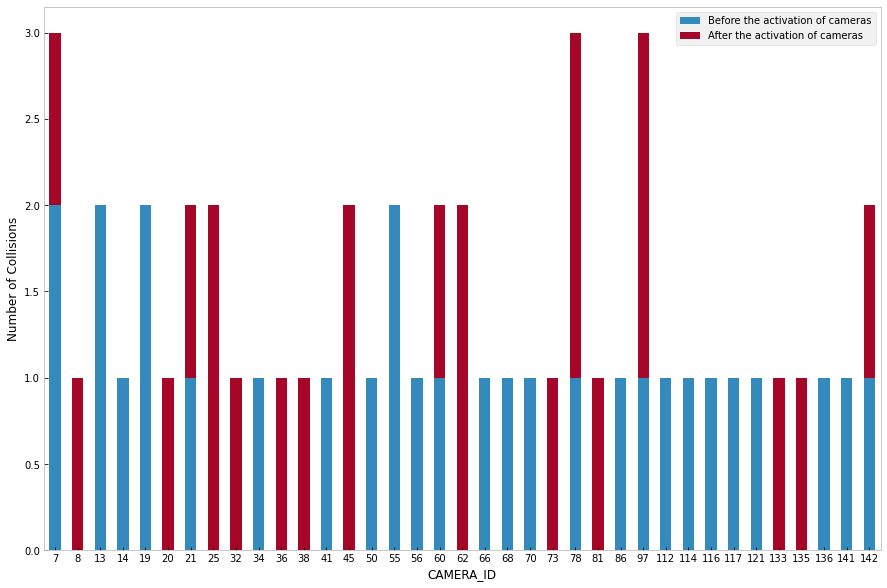

In [70]:
graph1 = redlight_summary.plot.bar(stacked=True, 
                                   rot=0, 
                                   figsize=(15,10), 
                                   grid=False)
graph1.legend(["Before the activation of cameras", "After the activation of cameras"])
graph1.set_ylabel('Number of Collisions')
graph1.set_facecolor('white')

In [ ]:
accident_organized.drop(columns=['X','Y'], inplace=True)

In [71]:
accident_organized.to_csv('merged redlight incident.csv')